In [1]:
from google.colab import files

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hanszhu0001","key":"ca8f90c2fcf89934366c413b59d3af7d"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!pwd

/content


In [7]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [02:04<00:00, 21.1MB/s]
100% 2.70G/2.70G [02:04<00:00, 23.3MB/s]


In [8]:
!unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [9]:
!pip install tensorflow

In [10]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import pathlib
import os
import shutil
import pickle

In [11]:
train_gen = image_dataset_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
                                         image_size=(256, 256))
test_gen = image_dataset_from_directory(directory="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                         image_size=(256, 256))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [12]:
l = train_gen.class_names
l

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [13]:
pl=[]
dl=[]
for x in l:
  l1 = x.split("__")
  if l1[0] not in pl:
    pl.append(l1[0])
  if l1[1] != "_healthy":
    dl.append(l1[1])
print(len(dl))
print(dl)
print(len(pl))
print(pl)

26
['_Apple_scab', '_Black_rot', '_Cedar_apple_rust', '_Powdery_mildew', '_Cercospora_leaf_spot Gray_leaf_spot', '_Common_rust_', '_Northern_Leaf_Blight', '_Black_rot', '_Esca_(Black_Measles)', '_Leaf_blight_(Isariopsis_Leaf_Spot)', '_Haunglongbing_(Citrus_greening)', '_Bacterial_spot', '_Bacterial_spot', '_Early_blight', '_Late_blight', '_Powdery_mildew', '_Leaf_scorch', '_Bacterial_spot', '_Early_blight', '_Late_blight', '_Leaf_Mold', '_Septoria_leaf_spot', '_Spider_mites Two-spotted_spider_mite', '_Target_Spot', '_Tomato_Yellow_Leaf_Curl_Virus', '_Tomato_mosaic_virus']
14
['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)', 'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry', 'Tomato']


In [14]:
fl = []
for x in pl:
  l2 =[]
  print(pl.index(x),"", x)
  print("")
  for y in l:
    if(x==y.split("__")[0]):
      l2.append(y)
  fl.append(l2)
print(fl)



0  Apple

1  Blueberry

2  Cherry_(including_sour)

3  Corn_(maize)

4  Grape

5  Orange

6  Peach

7  Pepper,_bell

8  Potato

9  Raspberry

10  Soybean

11  Squash

12  Strawberry

13  Tomato

[['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy'], ['Blueberry___healthy'], ['Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy'], ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy'], ['Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy'], ['Orange___Haunglongbing_(Citrus_greening)'], ['Peach___Bacterial_spot', 'Peach___healthy'], ['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy'], ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy'], ['Raspberry___healthy'], ['Soybean___healthy'], ['Squash___Powdery_mildew'], ['Strawberry___Leaf_scorch', '

In [16]:
!pip install keras

In [19]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.initializers import glorot_uniform
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

# Apple model training

In [20]:
!mkdir apple_train
!mkdir apple_test

In [21]:
for j in fl[0]:
  shutil.move("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train" + '/' + j,"/content/apple_train")

  shutil.move("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid" + '/' + j,"/content/apple_test")

In [22]:
train_datagen= ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=False,vertical_flip=False
                                  ,fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2)

val_datagen=ImageDataGenerator()

path_train="/content/apple_train"

path_valid="/content/apple_test"
train= train_datagen.flow_from_directory(directory=path_train,batch_size=32,target_size=(224,224),
                                         color_mode='rgb',class_mode='categorical',seed=42)

valid=val_datagen.flow_from_directory(directory=path_valid,batch_size=32,target_size=(224,224),color_mode='rgb',class_mode='categorical')

Found 7771 images belonging to 4 classes.
Found 1943 images belonging to 4 classes.


In [24]:
base_model_tf1 = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model_tf1.trainable = False

pt = Input(shape=(224, 224, 3))

# Wrap tf.cast inside a Lambda layer
func = tf.keras.layers.Lambda(lambda x: tf.cast(x, tf.float32))(pt)

x = preprocess_input(func)

# Pass through ResNet50 base model
model_resnet1 = base_model_tf1(x, training=False)

# Add custom layers
model_resnet1 = GlobalAveragePooling2D()(model_resnet1)
model_resnet1 = Dense(128, activation='relu')(model_resnet1)
model_resnet1 = Dense(64, activation='relu')(model_resnet1)
model_resnet1 = Dense(4, activation='softmax')(model_resnet1)

# Create the final model
model_main1 = Model(inputs=pt, outputs=model_resnet1)

# Print model summary
model_main1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 224, 224, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 224, 224)       │              0 │ lambda[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 224, 224)       │              0 │ lambda[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 224, 224)       │              0 │ lambda[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 224, 224, 3)    │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 224, 224, 3)    │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, 7, 7, 2048)     │     23,587,712 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 2048)           │              0 │ resnet50[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │        262,272 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 4)              │            260 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 23,858,500 (91.01 MB)

 Trainable params: 270,788 (1.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [25]:
model_main1.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
#Training
model_main1.fit(train,validation_data=valid,epochs=5,steps_per_epoch=200,verbose=1)

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 112s 485ms/step - accuracy: 0.8153 - loss: 0.4751 - val_accuracy: 0.9871 - val_loss: 0.0412
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.9909 - loss: 0.0414 - val_accuracy: 0.9851 - val_loss: 0.0451
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 91s 436ms/step - accuracy: 0.9841 - loss: 0.0432 - val_accuracy: 0.9933 - val_loss: 0.0250
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 25s 123ms/step - accuracy: 0.9840 - loss: 0.0384 - val_accuracy: 0.9928 - val_loss: 0.0217
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 114s 426ms/step - accuracy: 0.9915 - loss: 0.0262 - val_accuracy: 0.9892 - val_loss: 0.0330


CORN

# Corn model training

In [27]:
!mkdir corn_train
!mkdir corn_test

In [28]:
for j in fl[3]:
  shutil.move("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train" + '/' + j,"/content/corn_train")

  shutil.move("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid" + '/' + j,"/content/corn_test")

In [30]:
base_model_tf1=ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),classes=38)
base_model_tf1.trainable=False

pt=Input(shape=(224,224,3))
func = tf.keras.layers.Lambda(lambda x: tf.cast(x, tf.float32))(pt)
x=preprocess_input(func)
model_resnet1=base_model_tf1(x,training=False)
model_resnet1=GlobalAveragePooling2D()(model_resnet1)
model_resnet1=Dense(128,activation='relu')(model_resnet1)
model_resnet1=Dense(64,activation='relu')(model_resnet1)
model_resnet1=Dense(4,activation='softmax')(model_resnet1)


model_main2=Model(inputs=pt,outputs=model_resnet1)
model_main2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_1 (Lambda)         │ (None, 224, 224, 3)    │              0 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_3 (GetItem)      │ (None, 224, 224)       │              0 │ lambda_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_4 (GetItem)      │ (None, 224, 224)       │              0 │ lambda_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_5 (GetItem)      │ (None, 224, 224)       │              0 │ lambda_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack_1 (Stack)           │ (None, 224, 224, 3)    │              0 │ get_item_3[0][0],      │
│                           │                        │                │ get_item_4[0][0],      │
│                           │                        │                │ get_item_5[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 224, 224, 3)    │              0 │ stack_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, 7, 7, 2048)     │     23,587,712 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2048)           │              0 │ resnet50[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │        262,272 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 64)             │          8,256 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 4)              │            260 │ dense_4[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 23,858,500 (91.01 MB)

 Trainable params: 270,788 (1.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [31]:
train_datagen= ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=False,vertical_flip=False
                                  ,fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2)

val_datagen=ImageDataGenerator()

path_train="/content/corn_train"

path_valid="/content/corn_test"
train= train_datagen.flow_from_directory(directory=path_train,batch_size=32,target_size=(224,224),
                                         color_mode='rgb',class_mode='categorical',seed=42)

valid=val_datagen.flow_from_directory(directory=path_valid,batch_size=32,target_size=(224,224),color_mode='rgb',class_mode='categorical')

Found 7316 images belonging to 4 classes.
Found 1829 images belonging to 4 classes.


In [32]:
model_main2.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [33]:
#Training
model_main2.fit(train,validation_data=valid,epochs=5,steps_per_epoch=200,verbose=1)

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 111s 497ms/step - accuracy: 0.8832 - loss: 0.3104 - val_accuracy: 0.9639 - val_loss: 0.0924
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.9562 - loss: 0.1048 - val_accuracy: 0.9617 - val_loss: 0.0978
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 87s 424ms/step - accuracy: 0.9735 - loss: 0.0714 - val_accuracy: 0.9683 - val_loss: 0.0793
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.9743 - loss: 0.0628 - val_accuracy: 0.9699 - val_loss: 0.0743
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 87s 425ms/step - accuracy: 0.9772 - loss: 0.0598 - val_accuracy: 0.9661 - val_loss: 0.0819


GRAPES

# Grapes model training

In [34]:
!mkdir grape_train
!mkdir grape_test

In [35]:
for j in fl[4]:
  shutil.move("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train" + '/' + j,"/content/grape_train")

  shutil.move("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid" + '/' + j,"/content/grape_test")

In [36]:
base_model_tf1=ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),classes=38)
base_model_tf1.trainable=False

pt=Input(shape=(224,224,3))
func = tf.keras.layers.Lambda(lambda x: tf.cast(x, tf.float32))(pt)
x=preprocess_input(func)
model_resnet1=base_model_tf1(x,training=False)
model_resnet1=GlobalAveragePooling2D()(model_resnet1)
model_resnet1=Dense(128,activation='relu')(model_resnet1)
model_resnet1=Dense(64,activation='relu')(model_resnet1)
model_resnet1=Dense(4,activation='softmax')(model_resnet1)


model_main_grape=Model(inputs=pt,outputs=model_resnet1)
model_main_grape.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_2 (Lambda)         │ (None, 224, 224, 3)    │              0 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_6 (GetItem)      │ (None, 224, 224)       │              0 │ lambda_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_7 (GetItem)      │ (None, 224, 224)       │              0 │ lambda_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_8 (GetItem)      │ (None, 224, 224)       │              0 │ lambda_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack_2 (Stack)           │ (None, 224, 224, 3)    │              0 │ get_item_6[0][0],      │
│                           │                        │                │ get_item_7[0][0],      │
│                           │                        │                │ get_item_8[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 224, 224, 3)    │              0 │ stack_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, 7, 7, 2048)     │     23,587,712 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2048)           │              0 │ resnet50[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 128)            │        262,272 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 64)             │          8,256 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 4)              │            260 │ dense_7[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 23,858,500 (91.01 MB)

 Trainable params: 270,788 (1.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [37]:
train_datagen= ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=False,vertical_flip=False
                                  ,fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2)

val_datagen=ImageDataGenerator()

path_train="/content/grape_train"

path_valid="/content/grape_test"
train= train_datagen.flow_from_directory(directory=path_train,batch_size=32,target_size=(224,224),
                                         color_mode='rgb',class_mode='categorical',seed=42)

valid=val_datagen.flow_from_directory(directory=path_valid,batch_size=32,target_size=(224,224),color_mode='rgb',class_mode='categorical')

Found 7222 images belonging to 4 classes.
Found 1805 images belonging to 4 classes.


In [38]:
model_main_grape.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
#Training
model_main_grape.fit(train,validation_data=valid,epochs=5,steps_per_epoch=200,verbose=1)

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 115s 511ms/step - accuracy: 0.9017 - loss: 0.2701 - val_accuracy: 0.9867 - val_loss: 0.0483
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.9830 - loss: 0.0395 - val_accuracy: 0.9884 - val_loss: 0.0314
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 88s 427ms/step - accuracy: 0.9911 - loss: 0.0265 - val_accuracy: 0.9928 - val_loss: 0.0227
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.9806 - loss: 0.0456 - val_accuracy: 0.9945 - val_loss: 0.0198
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 129s 423ms/step - accuracy: 0.9890 - loss: 0.0285 - val_accuracy: 0.9723 - val_loss: 0.0758


POTATO

# Potato model training

In [40]:
!mkdir potato_train
!mkdir potato_test

In [41]:
for j in fl[8]:
  shutil.move("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train" + '/' + j,"/content/potato_train")

  shutil.move("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid" + '/' + j,"/content/potato_test")

In [51]:
base_model_tf1=ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),classes=38)
base_model_tf1.trainable=False

pt=Input(shape=(224,224,3))
func = tf.keras.layers.Lambda(lambda x: tf.cast(x, tf.float32))(pt)
x=preprocess_input(func)
model_resnet1=base_model_tf1(x,training=False)
model_resnet1=GlobalAveragePooling2D()(model_resnet1)
model_resnet1=Dense(128,activation='relu')(model_resnet1)
model_resnet1=Dense(64,activation='relu')(model_resnet1)
model_resnet1=Dense(3,activation='softmax')(model_resnet1)


model_main_potato=Model(inputs=pt,outputs=model_resnet1)
model_main_potato.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_5 (Lambda)         │ (None, 224, 224, 3)    │              0 │ input_layer_15[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_15 (GetItem)     │ (None, 224, 224)       │              0 │ lambda_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_16 (GetItem)     │ (None, 224, 224)       │              0 │ lambda_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_17 (GetItem)     │ (None, 224, 224)       │              0 │ lambda_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack_5 (Stack)           │ (None, 224, 224, 3)    │              0 │ get_item_15[0][0],     │
│                           │                        │                │ get_item_16[0][0],     │
│                           │                        │                │ get_item_17[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_5 (Add)               │ (None, 224, 224, 3)    │              0 │ stack_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, 7, 7, 2048)     │     23,587,712 │ add_5[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2048)           │              0 │ resnet50[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 128)            │        262,272 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 64)             │          8,256 │ dense_16[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_18 (Dense)          │ (None, 3)              │            195 │ dense_17[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 23,858,435 (91.01 MB)

 Trainable params: 270,723 (1.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [52]:
train_datagen= ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=False,vertical_flip=False
                                  ,fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2)

val_datagen=ImageDataGenerator()

path_train="/content/potato_train"

path_valid="/content/potato_test"
train= train_datagen.flow_from_directory(directory=path_train,batch_size=32,target_size=(224,224),
                                         color_mode='rgb',class_mode='categorical',seed=42)

valid=val_datagen.flow_from_directory(directory=path_valid,batch_size=32,target_size=(224,224),color_mode='rgb',class_mode='categorical')

Found 5702 images belonging to 3 classes.
Found 1426 images belonging to 3 classes.


In [53]:
model_main_potato.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
#Training
model_main_potato.fit(train,validation_data=valid,epochs=5,steps_per_epoch=200,verbose=1)

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 100s 430ms/step - accuracy: 0.9148 - loss: 0.2266 - val_accuracy: 0.9825 - val_loss: 0.0506
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 125s 364ms/step - accuracy: 0.9814 - loss: 0.0466 - val_accuracy: 0.9937 - val_loss: 0.0147
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 77s 366ms/step - accuracy: 0.9853 - loss: 0.0394 - val_accuracy: 0.9909 - val_loss: 0.0275
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 75s 365ms/step - accuracy: 0.9852 - loss: 0.0430 - val_accuracy: 0.9951 - val_loss: 0.0106
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 83s 371ms/step - accuracy: 0.9950 - loss: 0.0130 - val_accuracy: 0.9909 - val_loss: 0.0247


TOMATO

# Tomato model training

In [55]:
!mkdir tomato_train
!mkdir tomato_test

In [56]:
for j in fl[13]:
  shutil.move("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train" + '/' + j,"/content/tomato_train")

  shutil.move("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid" + '/' + j,"/content/tomato_test")

In [66]:
base_model_tf1=ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),classes=38)
base_model_tf1.trainable=False

pt=Input(shape=(224,224,3))
func = tf.keras.layers.Lambda(lambda x: tf.cast(x, tf.float32))(pt)
x=preprocess_input(func)
model_resnet1=base_model_tf1(x,training=False)
model_resnet1=GlobalAveragePooling2D()(model_resnet1)
model_resnet1=Dense(128,activation='relu')(model_resnet1)
model_resnet1=Dense(64,activation='relu')(model_resnet1)
model_resnet1=Dense(10,activation='softmax')(model_resnet1)


model_main_tomato=Model(inputs=pt,outputs=model_resnet1)
model_main_tomato.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_23            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_8 (Lambda)         │ (None, 224, 224, 3)    │              0 │ input_layer_23[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_24 (GetItem)     │ (None, 224, 224)       │              0 │ lambda_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_25 (GetItem)     │ (None, 224, 224)       │              0 │ lambda_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_26 (GetItem)     │ (None, 224, 224)       │              0 │ lambda_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack_8 (Stack)           │ (None, 224, 224, 3)    │              0 │ get_item_24[0][0],     │
│                           │                        │                │ get_item_25[0][0],     │
│                           │                        │                │ get_item_26[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_8 (Add)               │ (None, 224, 224, 3)    │              0 │ stack_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, 7, 7, 2048)     │     23,587,712 │ add_8[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2048)           │              0 │ resnet50[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_25 (Dense)          │ (None, 128)            │        262,272 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_26 (Dense)          │ (None, 64)             │          8,256 │ dense_25[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_27 (Dense)          │ (None, 10)             │            650 │ dense_26[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 23,858,890 (91.01 MB)

 Trainable params: 271,178 (1.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [67]:
train_datagen= ImageDataGenerator(shear_range=0.2,zoom_range=0.2,horizontal_flip=False,vertical_flip=False
                                  ,fill_mode='nearest',width_shift_range=0.2,height_shift_range=0.2)

val_datagen=ImageDataGenerator()

path_train="/content/tomato_train"

path_valid="/content/tomato_test"
train= train_datagen.flow_from_directory(directory=path_train,batch_size=32,target_size=(224,224),
                                         color_mode='rgb',class_mode='categorical',seed=42)

valid=val_datagen.flow_from_directory(directory=path_valid,batch_size=32,target_size=(224,224),color_mode='rgb',class_mode='categorical')

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [68]:
model_main_tomato.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [69]:
#Training
model_main_tomato.fit(train,validation_data=valid,epochs=5,steps_per_epoch=200,verbose=1)

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 120s 532ms/step - accuracy: 0.6028 - loss: 1.1918 - val_accuracy: 0.8665 - val_loss: 0.3831
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 96s 484ms/step - accuracy: 0.8729 - loss: 0.3743 - val_accuracy: 0.9101 - val_loss: 0.2690
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 78s 392ms/step - accuracy: 0.9138 - loss: 0.2637 - val_accuracy: 0.8992 - val_loss: 0.2961
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 130s 461ms/step - accuracy: 0.9188 - loss: 0.2263 - val_accuracy: 0.9112 - val_loss: 0.2574
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 91s 456ms/step - accuracy: 0.9364 - loss: 0.1788 - val_accuracy: 0.8964 - val_loss: 0.2986


# Example disease detection

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


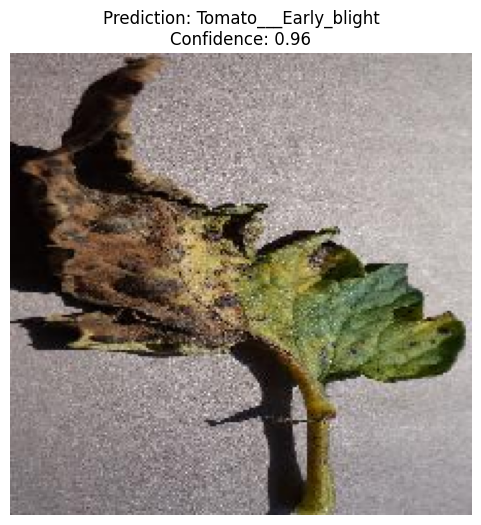

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


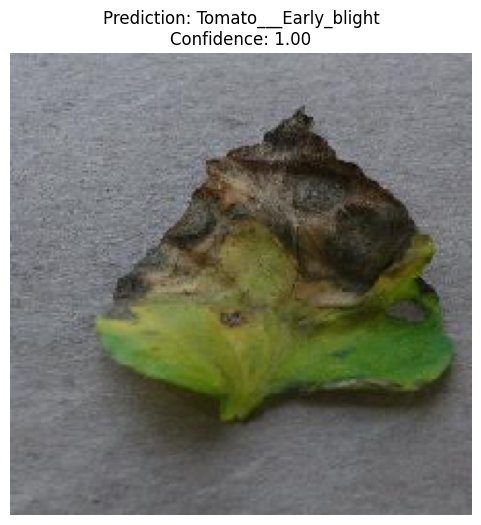

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


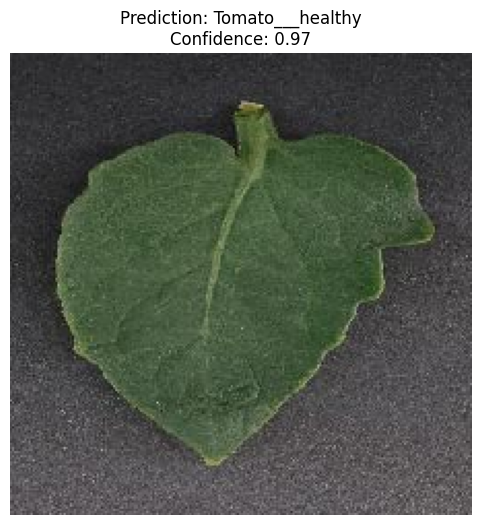

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


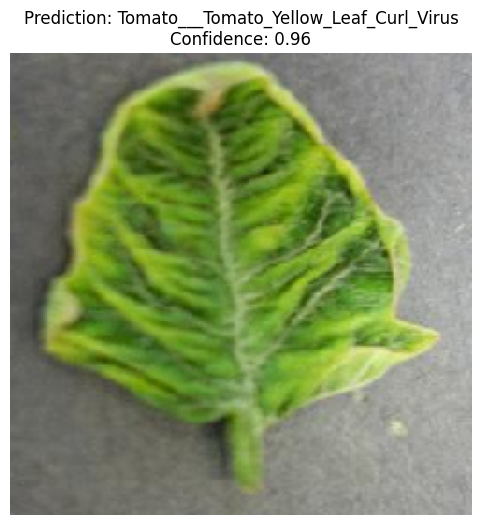

In [91]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    """Load and preprocess an image for prediction."""
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    image_array = preprocess_input(image_array)  # Apply ResNet50 preprocessing
    return image_array, image

def predict_and_visualize(model, image_path, class_names):
    """Run prediction and visualize the result."""
    image_array, image = preprocess_image(image_path)
    predictions = model.predict(image_array)
    predicted_index = np.argmax(predictions)
    predicted_class = class_names[predicted_index]
    confidence = predictions[0][predicted_index]

    # Visualization
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Prediction: {predicted_class}\nConfidence: {confidence:.2f}")
    plt.show()

# Tomato class names
tomato_classes = [
    "Tomato___Bacterial_spot",
    "Tomato___Early_blight",
    "Tomato___Late_blight",
    "Tomato___Leaf_Mold",
    "Tomato___Septoria_leaf_spot",
    "Tomato___Spider_mites Two-spotted_spider_mite",
    "Tomato___Target_Spot",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_mosaic_virus",
    "Tomato___healthy"
]

# List of test images
test_image_paths = [
    "test/test/TomatoEarlyBlight1.JPG",
    "test/test/TomatoEarlyBlight2.JPG",
    "test/test/TomatoHealthy2.JPG",
    "test/test/TomatoYellowCurlVirus6.JPG"
]

# Predict and visualize for each image
for test_image_path in test_image_paths:
    predict_and_visualize(model_main_tomato, test_image_path, tomato_classes)
